# Zeitraumbezogene Analysen

Das studentische Verhalten wird nachfolgend über bestimmte Zeiträume hinweg betrachtet.

**Zeitraum der aufgezeichneten Log-Einträge**
Montag, 12.10.2020 bis Donnerstag, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

### Import von Bibliotheken und anderen Erweiterungen

In [937]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [938]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [939]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [940]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Selektiver Import der Arbeitsdaten aus der MySQL-Datenbank

**Begrenzung der Auswahl auf Datensätze von Studenten**

In [941]:
# Gegenstand der Untersuchungen sind nur Datensätze von Benutzern, die zuvor als Studenten identifiziert wurden.
query = """SELECT * FROM moodle_data WHERE userstatus = 'student'"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

# Ausgabe der Arbeitsdaten
moodle_data

,courseid,Studiengang,userid,userstatus,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,student,-2,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,629,1,13,student,-2,viewed,\core\event\user_profile_viewed,user,3837,2020-10-17 09:00:11,,0
2,0,0,1,student,-2,sent,\core\event\notification_sent,notifications,3290921,2020-10-19 15:54:03,,0
3,4245,2,18,student,-2,viewed,\core\event\user_profile_viewed,user,3837,2020-10-23 13:19:56,,0
4,0,0,18,student,-2,sent,\core\event\message_sent,messages,109475,2020-10-23 13:23:00,,0
...,...,...,...,...,...,...,...,...,...,...,...,...
292540,28512,3,109,student,109,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0
292541,28512,3,109,student,0,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0
292542,0,0,109,student,109,viewed,\core\event\dashboard_viewed,,0,2021-06-03 21:13:25,,0
292543,28514,3,109,student,0,viewed,\core\event\course_viewed,,0,2021-06-03 21:13:36,,0


### Benutzer-Einträge im Gesamtzeitraum pro Studiengang

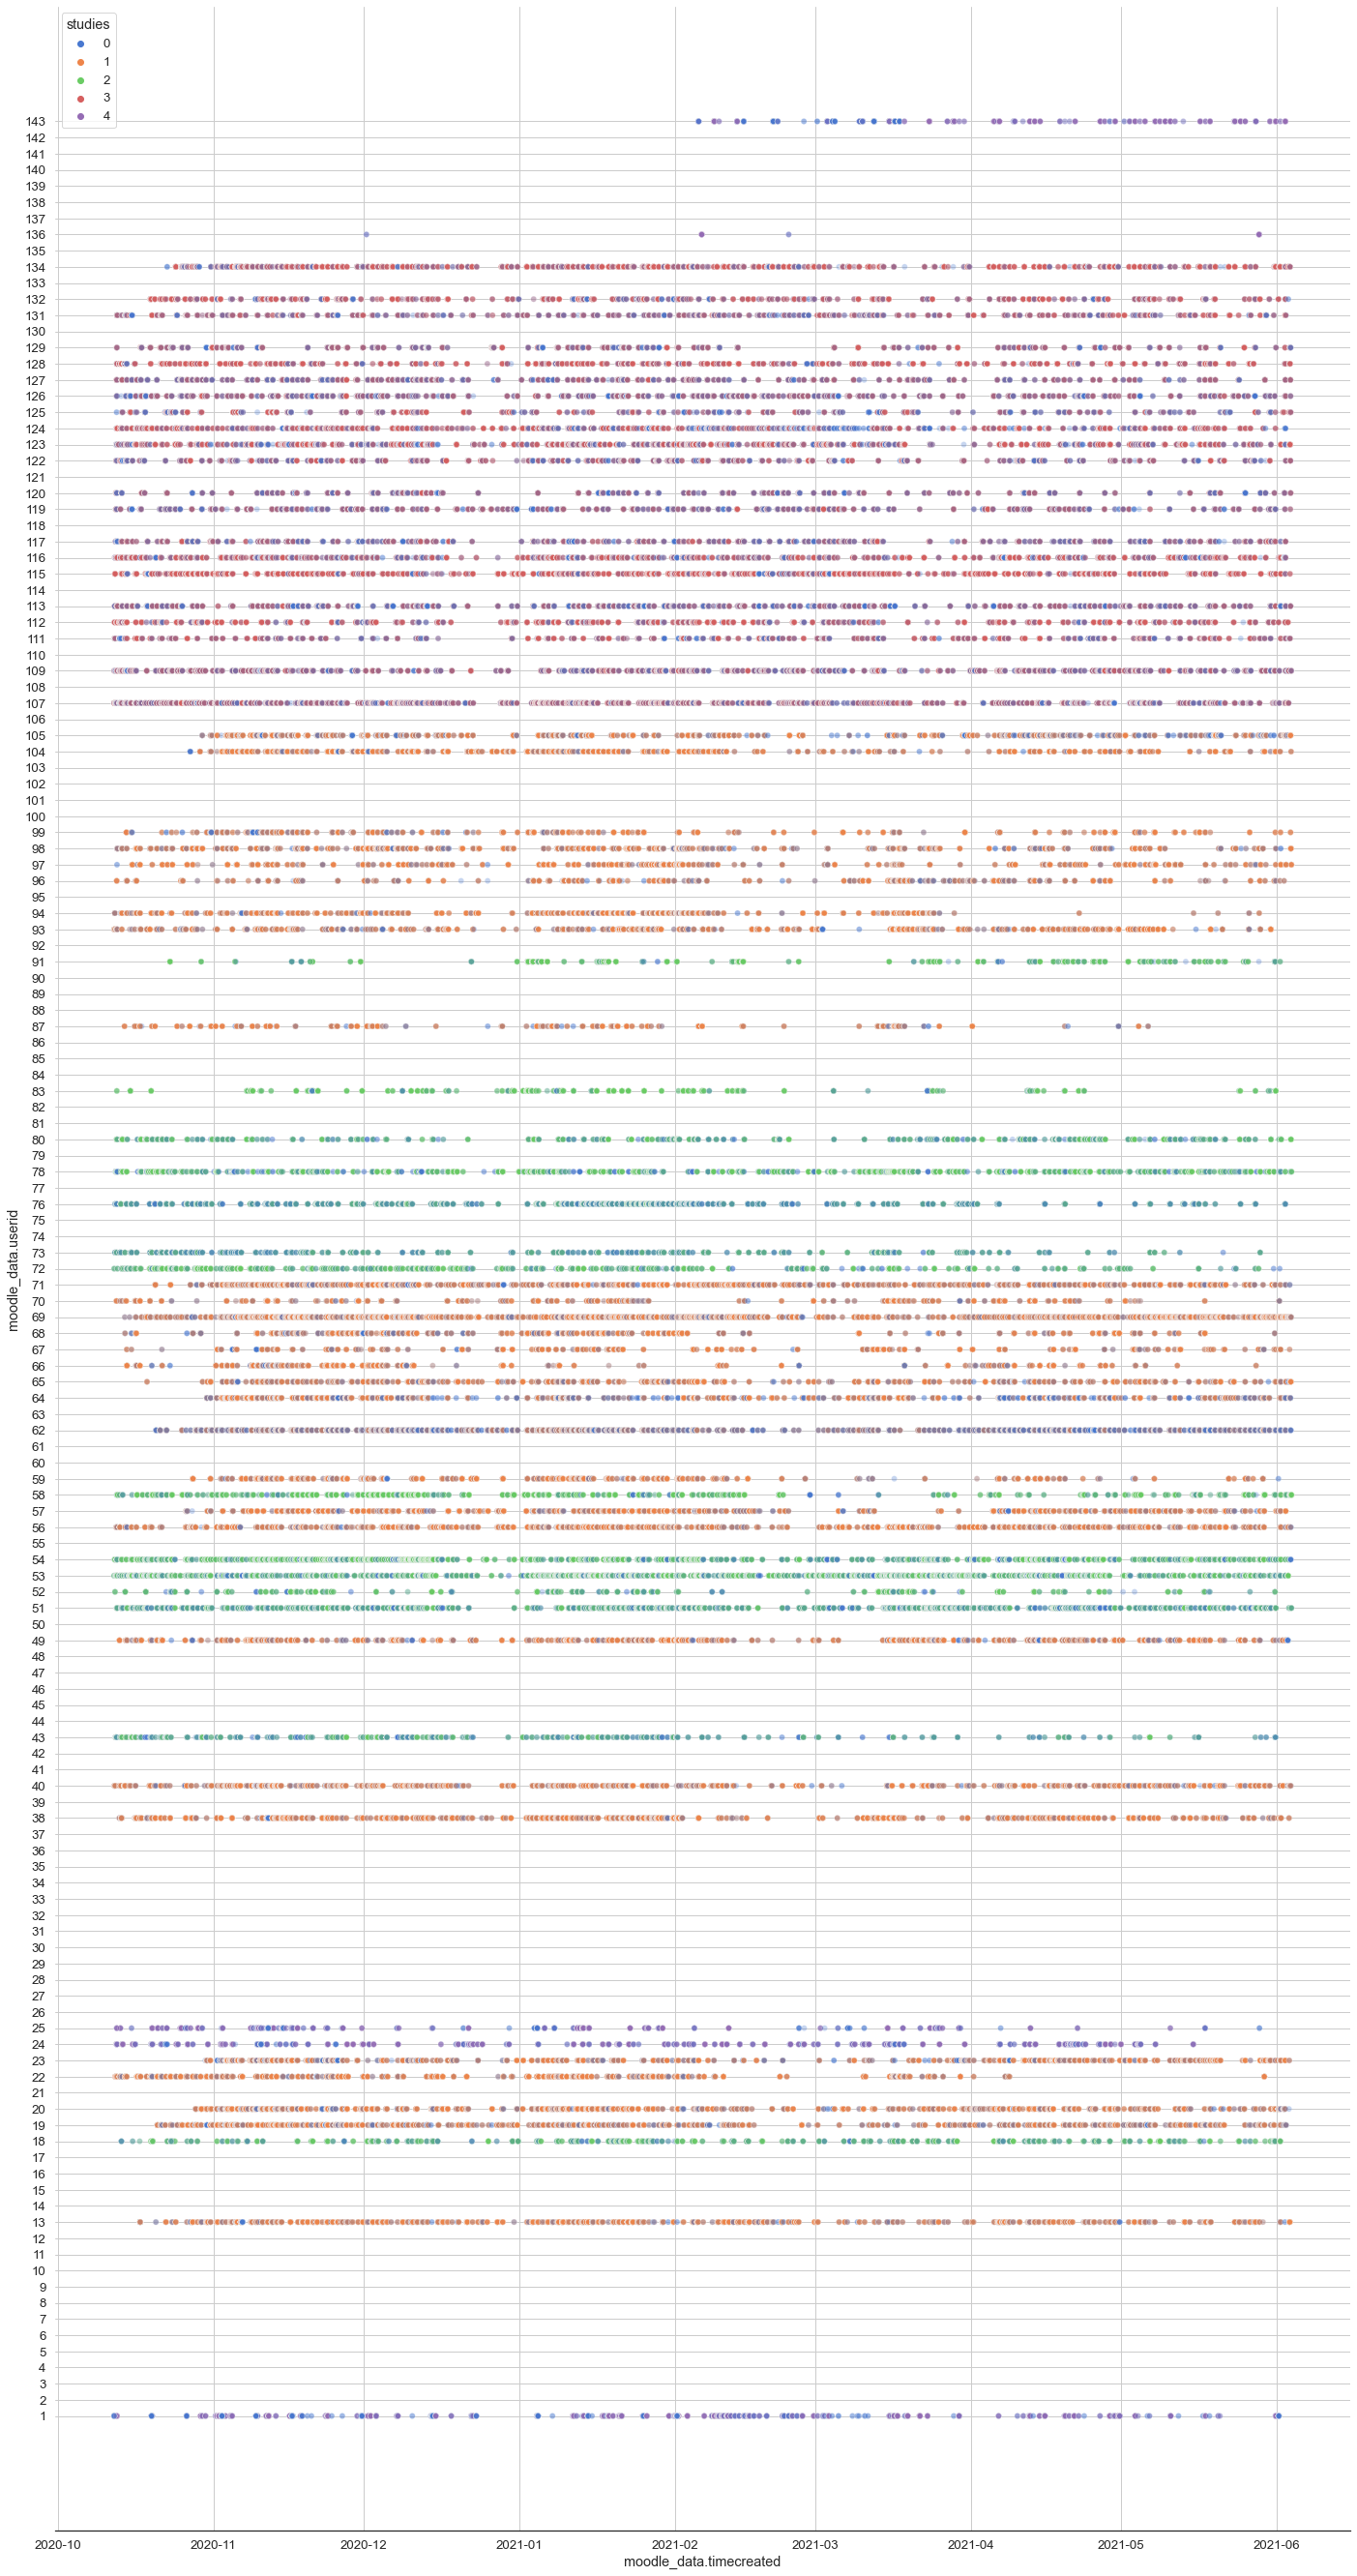

In [944]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 48)) # Größe der Visualisierung (in inch)
# plt.xticks(rotation=45) # Drehung der Achsenbeschriftung
#
# Visualisierung der Benutzer-Einträge im Gesamtzeitraum pro Studiengang
chart = sns.scatterplot(x=moodle_data.timecreated, y=moodle_data.userid, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', alpha=0.3)
# chart = sns.scatterplot(x=moodle_data.timecreated, y=moodle_data.userid[moodle_data.action == 'submitted'], hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', alpha=0.3)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.timecreated')
chart.set_ylabel('moodle_data.userid')
chart.set_yticks(range(1, 144, 1))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='studies', loc='upper left')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

Sichtbare erhöhte Aktivitäten im Studiengang 1 bei manchen Studenten in den Prüfungszeiträumen I und II.
Bei den anderen Studiengängen ist das Muster weniger stark ausgeprägt.

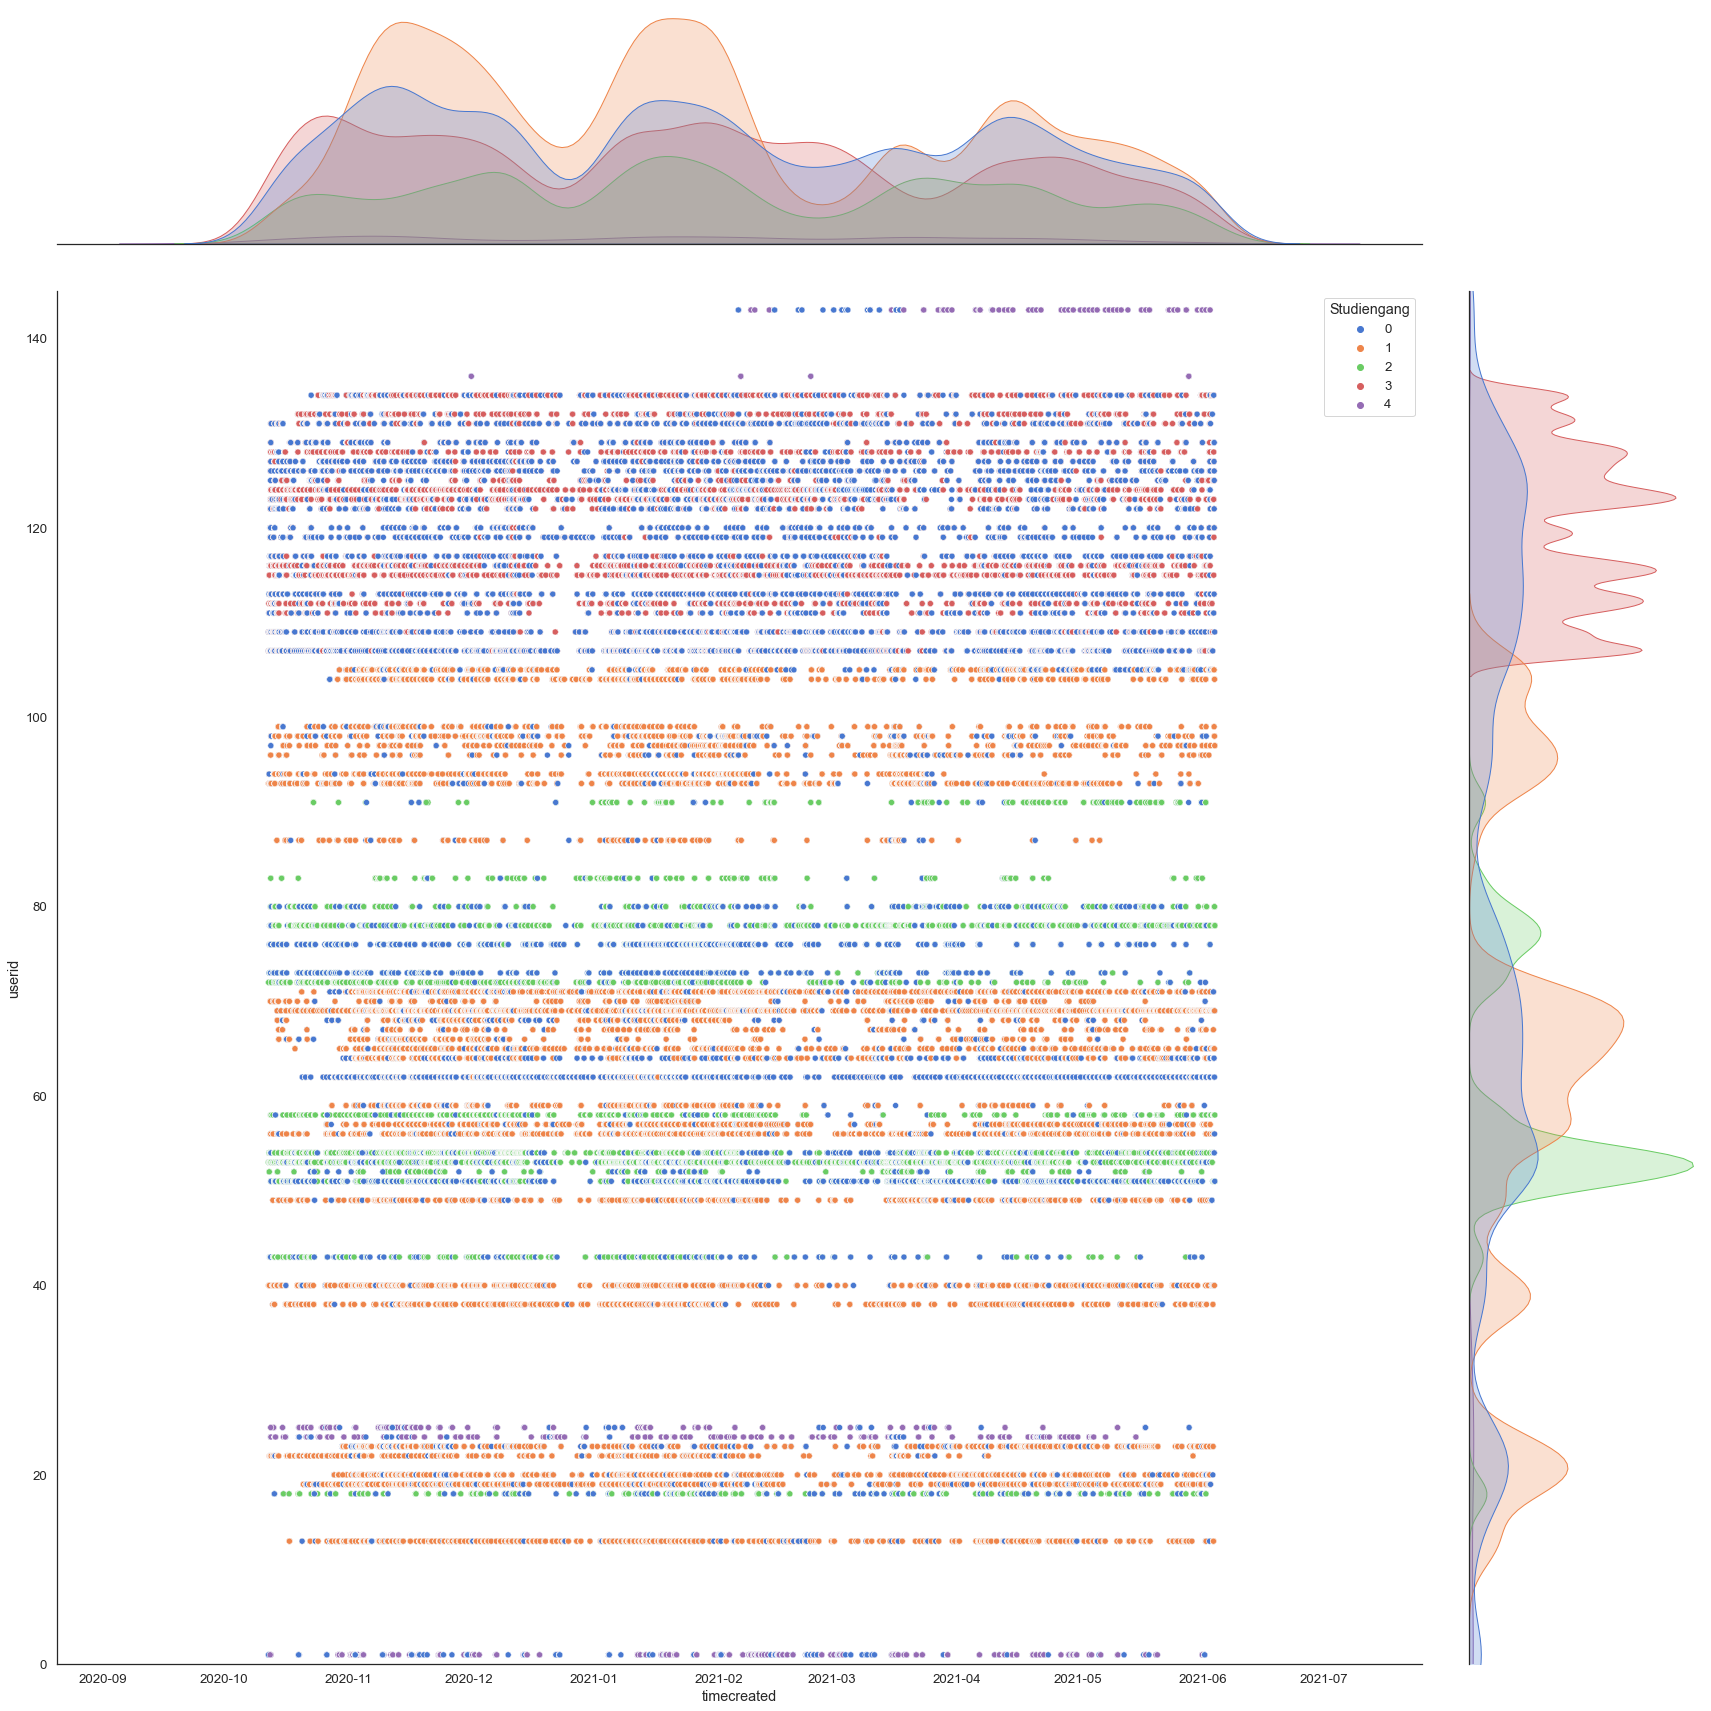

In [945]:
# Visualisierung der Benutzer-Einträge im Gesamtzeitraum pro Studiengang
chart = sns.jointplot(x=moodle_data.timecreated, y=moodle_data.userid, hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', height=24, ylim={0, 145})

# weitere Anweisungen zur Darstellung der Visualisierung
plt.show()

### Actions im Gesamtzeitraum pro Studiengang

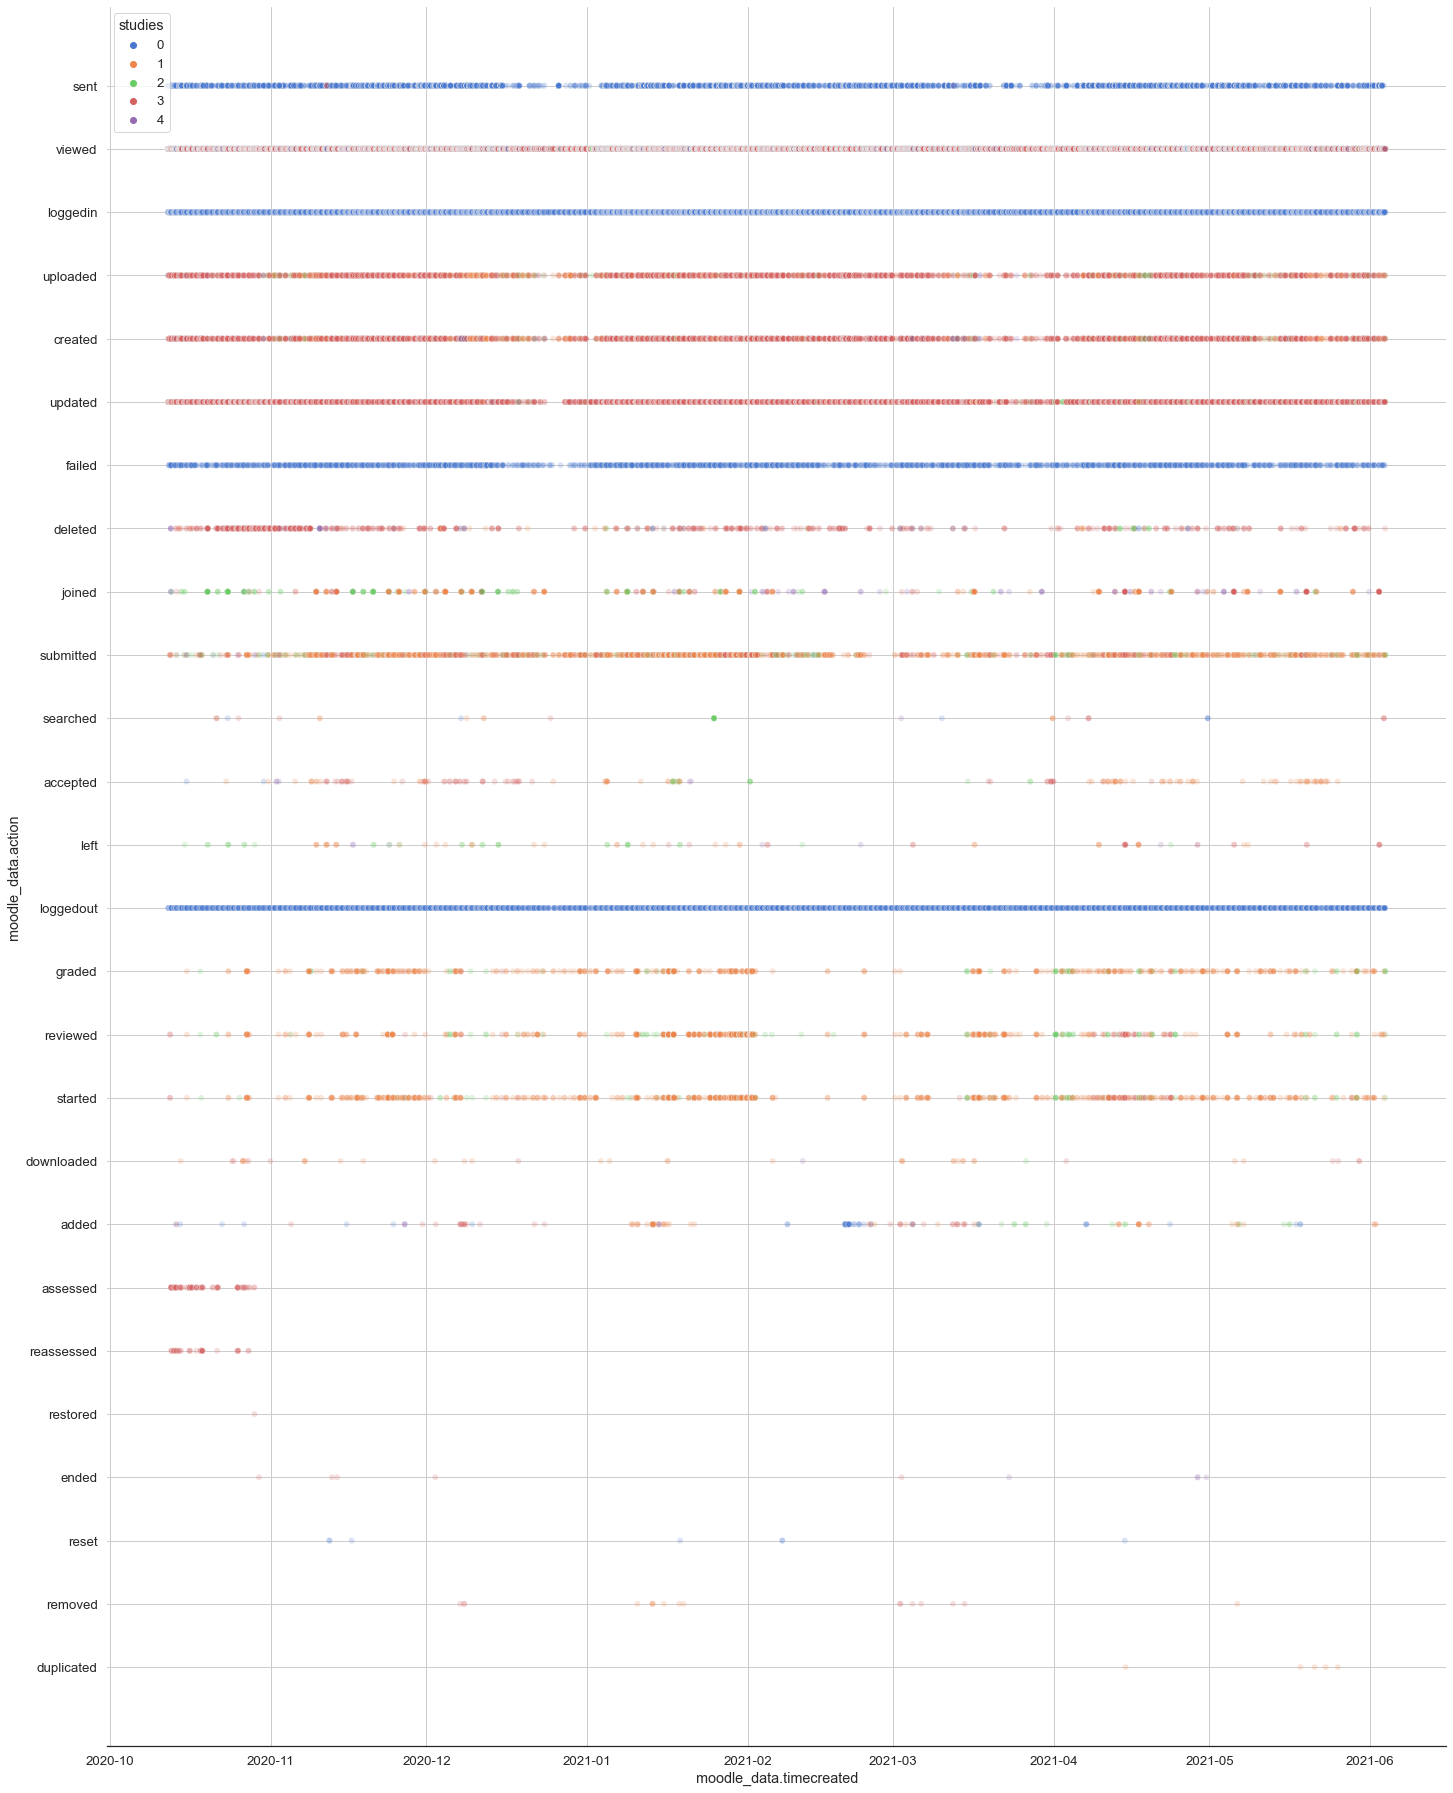

In [954]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 32)) # Größe der Visualisierung (in inch)
# plt.xticks(rotation=45) # Drehung der Achsenbeschriftung

# Visualisierung der Benutzer-Einträge im Gesamtzeitraum pro Studiengang
chart = sns.scatterplot(x=moodle_data.timecreated, y=moodle_data.action.sort_values(), hue=moodle_data.Studiengang, hue_order=['0', '1', '2', '3', '4'], palette='muted', alpha=0.2)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('moodle_data.timecreated')
chart.set_ylabel('moodle_data.action')
# chart.set_yticks(range(1, 43, 1))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(title='studies', loc='upper left')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()